<a href="https://colab.research.google.com/github/VIVEK818713/Feature-Engineering/blob/main/1_Feature_Scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering
##Feature engineering is the process of using domain knowledge to extract features  from raw data.
## we can divide feature engineering into 4 parts
##1. Feature Transformation
###--------- Missing Value imputation
###--------- Handling Categorical feature
###--------- Outlier detection
###--------- Feature Scaling
##2.Feature construction
##3.feature selection
##4.feature extraction

## Feature scaling
## basically it is last thing in the pipeline of feature engineering means after removing missing values,handling categorical feature , handling outlier and before giving the data to the machine learning algorithm you do feature scaling.
## Feature Scaling is a technique to standardize the independent features present in the data in a fixed range.it is very needed for certain machine learning algorithm like KNN.
## first we discuss standardization.
# type of feature scaling
## 1. Standradization
## 2. Normalization

#Zscore Normalization/Standardization
##Z-score normalization is a process that normalizes every value in a dataset such that the mean of all of the values is 0 and the standard deviation is 1.

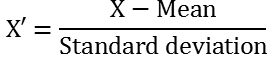


## go to kaggle and type social network ads or
## click on this link 
##https://www.kaggle.com/datasets/d4rklucif3r/social-network-ads


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/Colab Notebooks/Kaggle json'

In [ ]:
!kaggle datasets download -d d4rklucif3r/social-network-ads

In [ ]:
!unzip /content/social-network-ads.zip

Archive:  /content/social-network-ads.zip
  inflating: Social_Network_Ads.csv  


In [ ]:
df=pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


##Train test split

In [ ]:
X=df.drop('Purchased',1)
y=df['Purchased']  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

##StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, 
#it will learn the parameters(like mean and std dev etc...)
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [ ]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [ ]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [ ]:
X_train.describe()

,Age,EstimatedSalary
count,280.000000,280.000000
mean,37.864286,69807.142857
std,10.218201,34641.201654
min,18.000000,15000.000000
25%,30.000000,43000.000000
50%,37.000000,70500.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [ ]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [ ]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


##Effect of Scaling

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'],
            X_train_scaled['EstimatedSalary'],
            color='red')
ax2.set_title("After Scaling")
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

##Comparison of Distributions

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()


#Why scaling is important?

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

In [ ]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

In [ ]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [ ]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

In [ ]:
df.describe()

##Effect of Outlier

In [ ]:
df = df.append(pd.DataFrame({'Age':[5,90,95],
                             'EstimatedSalary':[1000,250000,350000],
                             'Purchased':[0,1,1]}),ignore_index=True)
df

In [ ]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [ ]:
X=df.drop('Purchased',1)
y=df['Purchased']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=0)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], 
            X_train_scaled['EstimatedSalary'],
            color='red')
ax2.set_title("After Scaling")
plt.show()

## **where we should use standardization**
##1. K-mean
##2. KNN
##3. ANN
##4. gradient Descent
##5. PCA

## **where you can avoid standardization**
## random forest
## decision tree
## gradient boost
## XGBOOST

# Normalization
##The measurement unit used can affect the data analysis. For instance, changing the measurement unit from kg to pounds. Expressing an attribute in smaller units will lead to a larger range for that attribute and thus give inefficient results. To avoid the dependence on the choice of measurement units, the data should be normalized. Normalization is used for scaling the data of attributes so that it falls in a smaller range, such as -2.0 to 2.0. It is usually used in classification algorithms.
## Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.
## if your are working in m/c learning then eliminate the units.if you are working with units then there will be problem.you sholuld work on common scale then work on this.
##for example weight may be in kg,miligm,grams etc. in unit so eliminate units
# Types of normalization
##1. Min Max scaling
##2. Mean normalization
##3. max absolute 
##4. robust scaling

##Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.
##Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.
##However, at the end of the day, the choice of using normalization or standardization will depend on your problem and the machine learning algorithm you are using. There is no hard and fast rule to tell you when to normalize or standardize your data. You can always start by fitting your model to raw, normalized and standardized data and compare the performance for best results.

## Min Max Normalization:
###Min-max normalization is one of the most common ways to normalize data. For every feature, the minimum value of that feature gets transformed into a 0, the maximum value gets transformed into a 1, and every other value gets transformed into a decimal between 0 and 1.

##Another way to normalize the input features/variables (apart from the standardization that scales the features so that they have μ=0and σ=1) is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

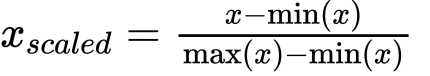

#Why to normalize prior to model fitting?
##The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

##This can be very useful for some ML models like the Multi-layer Perceptrons (MLP), where the back-propagation can be more stable and even faster when input features are min-max scaled (or in general scaled) compared to using the original unscaled data.

##Note: Tree-based models are usually not dependent on scaling, but non-tree models models such as SVM, LDA etc. are often hugely dependent on it.

In [ ]:
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
#seaborn has many dataset you canget dataset from this link
#  https://github.com/mwaskom/seaborn-data
# Or if you know the dataset you just write sns.load_dataset("dataset name")
df = sns.load_dataset("titanic")
df.head()

In [ ]:
df2 = df[['survived',"pclass",'age','parch']]
df2.head()

In [ ]:
df3 = df2.fillna(df2.mean())

In [ ]:
X = df3.drop("survived", axis = 1)
y = df3["survived"]
print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X, y, 
                                                   test_size=0.2, 
                                                   random_state=51)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

In [ ]:
mmc = MinMaxScaler()
mmc.fit(X_train)

In [ ]:
X_train_mmc = mmc.transform(X_train)
X_test_mmc = mmc.transform(X_test)

In [ ]:
X_train_mmc =  pd.DataFrame(X_train_mmc,columns=['pclass','age','parch'])
X_test_mmc =  pd.DataFrame(X_test_mmc,columns=['pclass','age','parch'])

In [ ]:
X_train_mmc.describe()

In [ ]:
X_train_mmc.describe().round(2)

In [ ]:
sns.pairplot(X_train)

In [ ]:
sns.pairplot(X_train_mmc)

##Python working example
##Here we will use the famous iris dataset that is available through scikit-learn.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import numpy as np
# use the iris dataset
X, y = load_iris(return_X_y=True)
print(X.shape)
# (150, 4) # 150 samples (rows) with 4 features/variables (columns)
# build the scaler model
scaler = MinMaxScaler()
# fit using the train set
scaler.fit(X)
# transform the test test
X_scaled = scaler.transform(X)
# Verify minimum value of all features
X_scaled.min(axis=0)
# array([0., 0., 0., 0.])
# Verify maximum value of all features
X_scaled.max(axis=0)
# array([1., 1., 1., 1.])
# Manually normalise without using scikit-learn
X_manual_scaled = (X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))
# Verify manually VS scikit-learn estimation
print(np.allclose(X_scaled, X_manual_scaled))
#True  

##The effect of the transform in a visual example

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_title("Original data")
axes[1].scatter(X_scaled[:,0], X_scaled[:,1], c=y)
axes[1].set_title("MinMax scaled data")
plt.show()